# Feature and Model Engineering Case for Machine Learning

## Question 1: Loading the Data

In [212]:
# Standard Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import os
from sklearn.metrics import classification_report,confusion_matrix,auc,roc_curve,roc_auc_score

In [3]:
data = pd.read_json('transactions.txt',lines=True)

In [4]:
data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


In [46]:
dataV1 = data.copy()

In [47]:
dataV1 = dataV1.applymap(lambda x: None if x=="" else x )

In [48]:
dataV1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  object 
 10  posConditionCode          785954 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [49]:
dataV1.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,4508.739089
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,6457.442068
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,47498.810000


As we can see, the columns echobuffer,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd are fully null, while some other columns contain nulls as well.

In [53]:
dataV1.drop(['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'],axis=1,inplace=True)

In [55]:
dataV1.dropna(inplace=True)

In [56]:
dataV1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 776668 entries, 0 to 786362
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             776668 non-null  int64  
 1   customerId                776668 non-null  int64  
 2   creditLimit               776668 non-null  int64  
 3   availableMoney            776668 non-null  float64
 4   transactionDateTime       776668 non-null  object 
 5   transactionAmount         776668 non-null  float64
 6   merchantName              776668 non-null  object 
 7   acqCountry                776668 non-null  object 
 8   merchantCountryCode       776668 non-null  object 
 9   posEntryMode              776668 non-null  object 
 10  posConditionCode          776668 non-null  object 
 11  merchantCategoryCode      776668 non-null  object 
 12  currentExpDate            776668 non-null  object 
 13  accountOpenDate           776668 non-null  object

##### Unique Values

In [57]:
dataV1['acqCountry'].unique()

array(['US', 'CAN', 'MEX', 'PR'], dtype=object)

In [58]:
dataV1['posEntryMode'].unique()

array(['02', '09', '05', '80', '90'], dtype=object)

In [59]:
dataV1['posConditionCode'].unique()

array(['01', '08', '99'], dtype=object)

In [60]:
dataV1['merchantCategoryCode'].unique()

array(['rideshare', 'entertainment', 'mobileapps', 'fastfood',
       'food_delivery', 'auto', 'online_retail', 'gym', 'health',
       'personal care', 'food', 'fuel', 'online_subscriptions',
       'online_gifts', 'hotels', 'airline', 'furniture', 'subscriptions',
       'cable/phone'], dtype=object)

## Question 2: Plot

In [106]:
dataV1['transactionType'].unique()

array(['PURCHASE', 'ADDRESS_VERIFICATION', 'REVERSAL'], dtype=object)

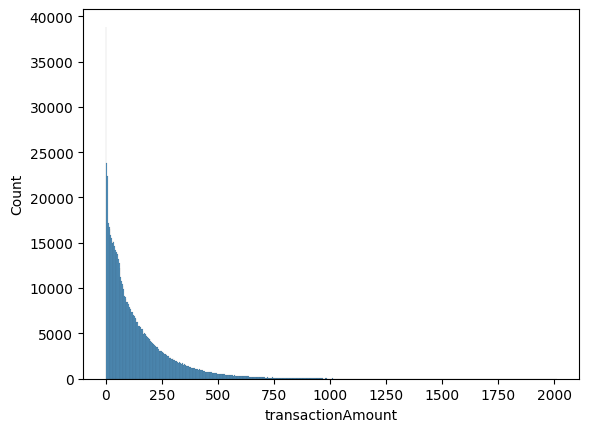

In [61]:
transaction_hist = sns.histplot(data=dataV1,x="transactionAmount")

In [62]:
dataV1.groupby(by=['merchantName']).aggregate({'merchantName':['count'],'transactionAmount':['min','max','mean']}).reset_index().sort_values(by=[('merchantName','count')],ascending=False).head(20)

merchantName        transactionAmount                     
                                count               min      max        mean
2085                      Uber  25292               0.0  1398.23  145.785412
1060                      Lyft  25218               0.0  1318.44  146.484408
2481               oldnavy.com  16790               0.0  1608.35  144.945697
2484               staples.com  16775               0.0  1496.82  145.539763
2469               alibaba.com  16764               0.0  1780.60  145.025598
2471                 apple.com  16689               0.0  1349.53  145.079501
2486               walmart.com  16659               0.0  1530.35  146.256460
2475                  ebay.com  16647               0.0  1515.82  146.162211
2473             cheapfast.com  16643               0.0  1357.88  144.694699
2485                target.com  16623               0.0  1442.50  146.136115
2470                amazon.com  16571               0.0  1317.64  143.485527
2483                 sears.com  16543               0.0  1337.87  145.050537
2474              discount.com  16523               0.0  2011.54  145.479243
2477                   gap.com  16453               0.0  1370.49  144.885218
598      Fresh Online Services   8275               0.0  1291.94  146.424242
159       Blue Mountain eCards   8272               0.0  1235.60  146.493593
597              Fresh Flowers   8226               0.0  1566.37  146.632593
1197           Next Day eCards   8191               0.0  1286.58  145.709383
1196  Next Day Online Services   8183               0.0  1437.78  143.887688
599               Fresh eCards   8172               0.0  1493.69  147.360652

The plot is a right skewed histogram. Looking at the plot, we can see that the majority of transactions occured within 0 to $1500. This makes sense, as the mean of the transactions is around $145. This shows that most of the transactions are for low value services, like coffees or ubers/lyfts and products from staples.

## Question 3: Data Wrangling - Duplicate Transactions

In [71]:
dataV2 = dataV1.copy()

In [72]:
dataV2['transactionDateTime'] = pd.to_datetime(dataV2['transactionDateTime'])

In [78]:
dataV2['transaction_date'] = dataV2['transactionDateTime'].dt.strftime('%m/%d/%Y')

##### Reversal Rows

In [225]:
dataV3 = dataV3.sort_values(['accountNumber', 'transactionDateTime'])

In [227]:
# creating a boolean mask for reversed transactions
reversal_mask = (dataV3['accountNumber'] == dataV3['accountNumber'].shift(1)) & \
       (dataV3['transactionAmount'] == dataV3['transactionAmount'].shift(1)) & \
       (dataV3['merchantName'] == dataV3['merchantName'].shift(1)) & \
       (dataV3['transaction_date'] == dataV3['transaction_date'].shift(1)) & \
       (dataV3['transactionType'] == 'REVERSAL') & \
       (dataV3['transactionType'].shift(1) == 'PURCHASE')

# updating the is_reversed column using boolean indexing
dataV3.loc[reversal_mask, 'is_reversed'] = True

In [230]:
dataV3[dataV3['is_reversed']==True]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transaction_date,is_reversed
684576,100088067,100088067,50000,49811.88,2016-11-20 08:00:04,22.32,AMC #79863,US,US,09,...,546,546,4615,REVERSAL,188.12,True,False,False,11/20/2016,True
28852,100328049,100328049,5000,4605.10,2016-01-15 20:36:18,43.74,Lyft,US,US,09,...,206,206,2941,REVERSAL,394.90,False,False,False,01/15/2016,True
776286,101596991,101596991,5000,2107.83,2016-12-30 19:50:06,294.01,Franks Sandwitch Bar,US,US,05,...,395,395,171,REVERSAL,2892.17,True,False,False,12/30/2016,True
209590,101876201,101876201,250,131.85,2016-04-14 06:08:33,118.15,alibaba.com,US,US,05,...,371,371,4725,REVERSAL,118.15,False,False,False,04/14/2016,True
342422,101876201,101876201,250,207.46,2016-06-16 15:39:11,49.07,cheapfast.com,US,US,02,...,371,371,4725,REVERSAL,42.54,False,False,False,06/16/2016,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603139,999086814,999086814,10000,4199.02,2016-10-14 21:40:47,51.58,Lyft,US,US,09,...,715,715,252,REVERSAL,5800.98,False,False,False,10/14/2016,True
671497,999086814,999086814,10000,4092.38,2016-11-14 11:31:16,153.89,Uber,US,US,02,...,715,715,252,REVERSAL,5907.62,False,False,False,11/14/2016,True
457573,999257059,999257059,15000,14322.20,2016-08-09 11:25:46,557.11,Washington Times,US,US,05,...,959,959,8291,REVERSAL,677.80,False,False,False,08/09/2016,True
150152,999258704,999258704,5000,4246.82,2016-03-16 07:14:17,367.13,Uber,US,US,09,...,708,708,3757,REVERSAL,753.18,False,False,False,03/16/2016,True


##### Multi Swipe Rows

In [122]:
multi_swipe = dataV2[(dataV2.duplicated(subset=['customerId','merchantName','transactionAmount','transaction_date','cardLast4Digits','cardPresent'],keep='first'))]

In [123]:
multi_swipe.head(15)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,transaction_date
39,574788567,574788567,2500,2200.98,2016-05-24 01:38:03,215.13,Convenient Tire,US,US,09,...,2015-10-13,206,206,8522,REVERSAL,299.02,True,False,False,05/24/2016
133,984504651,984504651,50000,46367.41,2016-01-16 09:53:15,450.74,Planet Fitness #849960,US,US,05,...,2015-07-27,640,640,8332,REVERSAL,3632.59,False,False,False,01/16/2016
200,984504651,984504651,50000,36452.49,2016-02-12 05:10:49,34.92,Golds Gym #747443,US,US,09,...,2015-07-27,640,640,8332,REVERSAL,13547.51,False,False,False,02/12/2016
263,984504651,984504651,50000,26680.99,2016-03-12 06:34:29,118.52,AMC #706324,US,US,02,...,2015-07-27,640,640,8332,PURCHASE,23319.01,True,False,False,03/12/2016
264,984504651,984504651,50000,26562.47,2016-03-12 06:36:41,118.52,AMC #706324,US,US,02,...,2015-07-27,640,640,8332,PURCHASE,23437.53,True,False,False,03/12/2016
281,984504651,984504651,50000,24316.12,2016-03-18 13:57:04,26.71,Planet Fitness #692929,US,US,02,...,2015-07-27,640,640,8332,PURCHASE,25683.88,True,False,False,03/18/2016
339,984504651,984504651,50000,16503.49,2016-04-08 22:21:11,43.21,WSC #994275,US,US,02,...,2016-03-26,640,640,8332,PURCHASE,33496.51,False,False,False,04/08/2016
413,984504651,984504651,50000,7302.32,2016-05-07 07:32:54,23.82,Golds Gym #846582,US,US,09,...,2016-05-05,640,640,8332,PURCHASE,42697.68,True,False,False,05/07/2016
461,984504651,984504651,50000,13054.71,2016-06-04 12:14:55,270.10,EZ Putt Putt #40513,US,US,05,...,2016-05-05,640,640,8332,PURCHASE,36945.29,True,False,False,06/04/2016
468,984504651,984504651,50000,12228.86,2016-06-05 13:39:15,234.45,Regal Cinemas #729464,US,US,02,...,2016-05-05,640,640,8332,REVERSAL,37771.14,True,False,False,06/05/2016


In [124]:
multi_swipe['cardPresent'].value_counts()

cardPresent
False    7315
True     6053
Name: count, dtype: int64

In [125]:
multi_swipe['isFraud'].value_counts()

isFraud
False    13140
True       228
Name: count, dtype: int64

In [126]:
multi_swipe['expirationDateKeyInMatch'].value_counts()

expirationDateKeyInMatch
False    13355
True        13
Name: count, dtype: int64

Looking at the above stats, we can see that multi swipe and reversals, are issues that do not lend itself to fraudulent activities in general.

## Question 4: Model 

In [163]:
dataV4 = dataV1.copy()

In [164]:
dataV4['transactionDateTime'] = pd.to_datetime(dataV4['transactionDateTime'])

In [194]:
dataV5 = pd.get_dummies(dataV4.drop(['accountNumber','customerId','transactionDateTime','merchantName','dateOfLastAddressChange','accountOpenDate','currentExpDate'],axis=1),prefix_sep='_', dtype=float)

In [195]:
dataV5

,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,...,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL
0,5000,5000.00,98.55,414,414,1803,0.00,False,False,False,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,5000,5000.00,74.51,486,486,767,0.00,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000,5000.00,7.47,486,486,767,0.00,False,False,False,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5000,5000.00,7.47,486,486,767,0.00,False,False,False,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5000,5000.00,71.18,885,885,3143,0.00,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,50000,48904.96,119.92,936,936,3783,1095.04,False,False,False,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
786359,50000,48785.04,18.89,939,939,3388,1214.96,False,False,False,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
786360,50000,48766.15,49.43,936,936,3783,1233.85,False,False,False,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
786361,50000,48716.72,49.89,939,939,3388,1283.28,False,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [198]:
dataV5['cardPresent'] = dataV5['cardPresent'].astype(int)
dataV5['expirationDateKeyInMatch'] = dataV5['cardPresent'].astype(int)
dataV5['isFraud'] = dataV5['isFraud'].astype(int)

In [199]:
X = dataV5.drop(['isFraud'],axis=1)
y = dataV5['isFraud']

In [205]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7) 

In [206]:
print(X_train.shape)
print(X_test.shape)

(543667, 47)
(233001, 47)


In [209]:
xgb = XGBClassifier(n_jobs=os.cpu_count())

In [210]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=16, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [211]:
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
feature_values = xgb.feature_importances_
predict_proba_auc_train = xgb.predict_proba(X_train)
predict_proba_auc_test = xgb.predict_proba(X_test)

In [214]:
def plot_model(cnf,cfr,coeff,auc_pd,batch):
    fig_n, axe = plt.subplots(2, 2, figsize=(30, 15))

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_percentages = ["{0:.2%}".format(value) for value in
                         cnf.flatten()/np.sum(cnf)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    cnf = cnf/np.sum(cnf) 
    cfr = pd.DataFrame(cfr).transpose()
    cfr = cfr[['precision', 'recall', 'f1-score','support']]

    confusion_matrix_plots = sns.heatmap(cnf, annot=labels, fmt='', cmap='flare',ax=axe[0][0])
    class_report_plots = sns.heatmap(cfr,cmap='flare',annot=cfr,ax=axe[0][1],fmt='g')
    auc_plot = sns.heatmap(auc_pd,cmap='flare',annot=auc_pd,ax=axe[1][0],fmt='g')
    coeffs = sns.barplot(coeff.iloc[0:5],y="Feature Names",x="Coefficient Value",ax=axe[1][1],palette="flare")

    axe[0][0].set_title("Confusion Matrix for: "+batch)
    axe[0][1].set_title("Classification Report for: "+batch)
    axe[1][0].set_title("AUC Score for: "+batch)
    axe[1][1].set_title("Top 10 Co-Efficients for: "+batch)

In [213]:
coeff_table = pd.DataFrame({"Feature Names": X_train.columns, "Coefficient Value": abs(feature_values)})
coeff_table = coeff_table.sort_values(by=['Coefficient Value'],ascending=False)
    
fpr, tpr, thresholds = roc_curve(y_train,predict_proba_auc_train[:,1])
auc_value = auc(fpr,tpr)
auc_pd_train = pd.DataFrame({"AUC":[auc_value]})

fpr, tpr, thresholds = roc_curve(y_test,predict_proba_auc_test[:,1])
auc_value = auc(fpr,tpr)
auc_pd_test = pd.DataFrame({"AUC":[auc_value]})

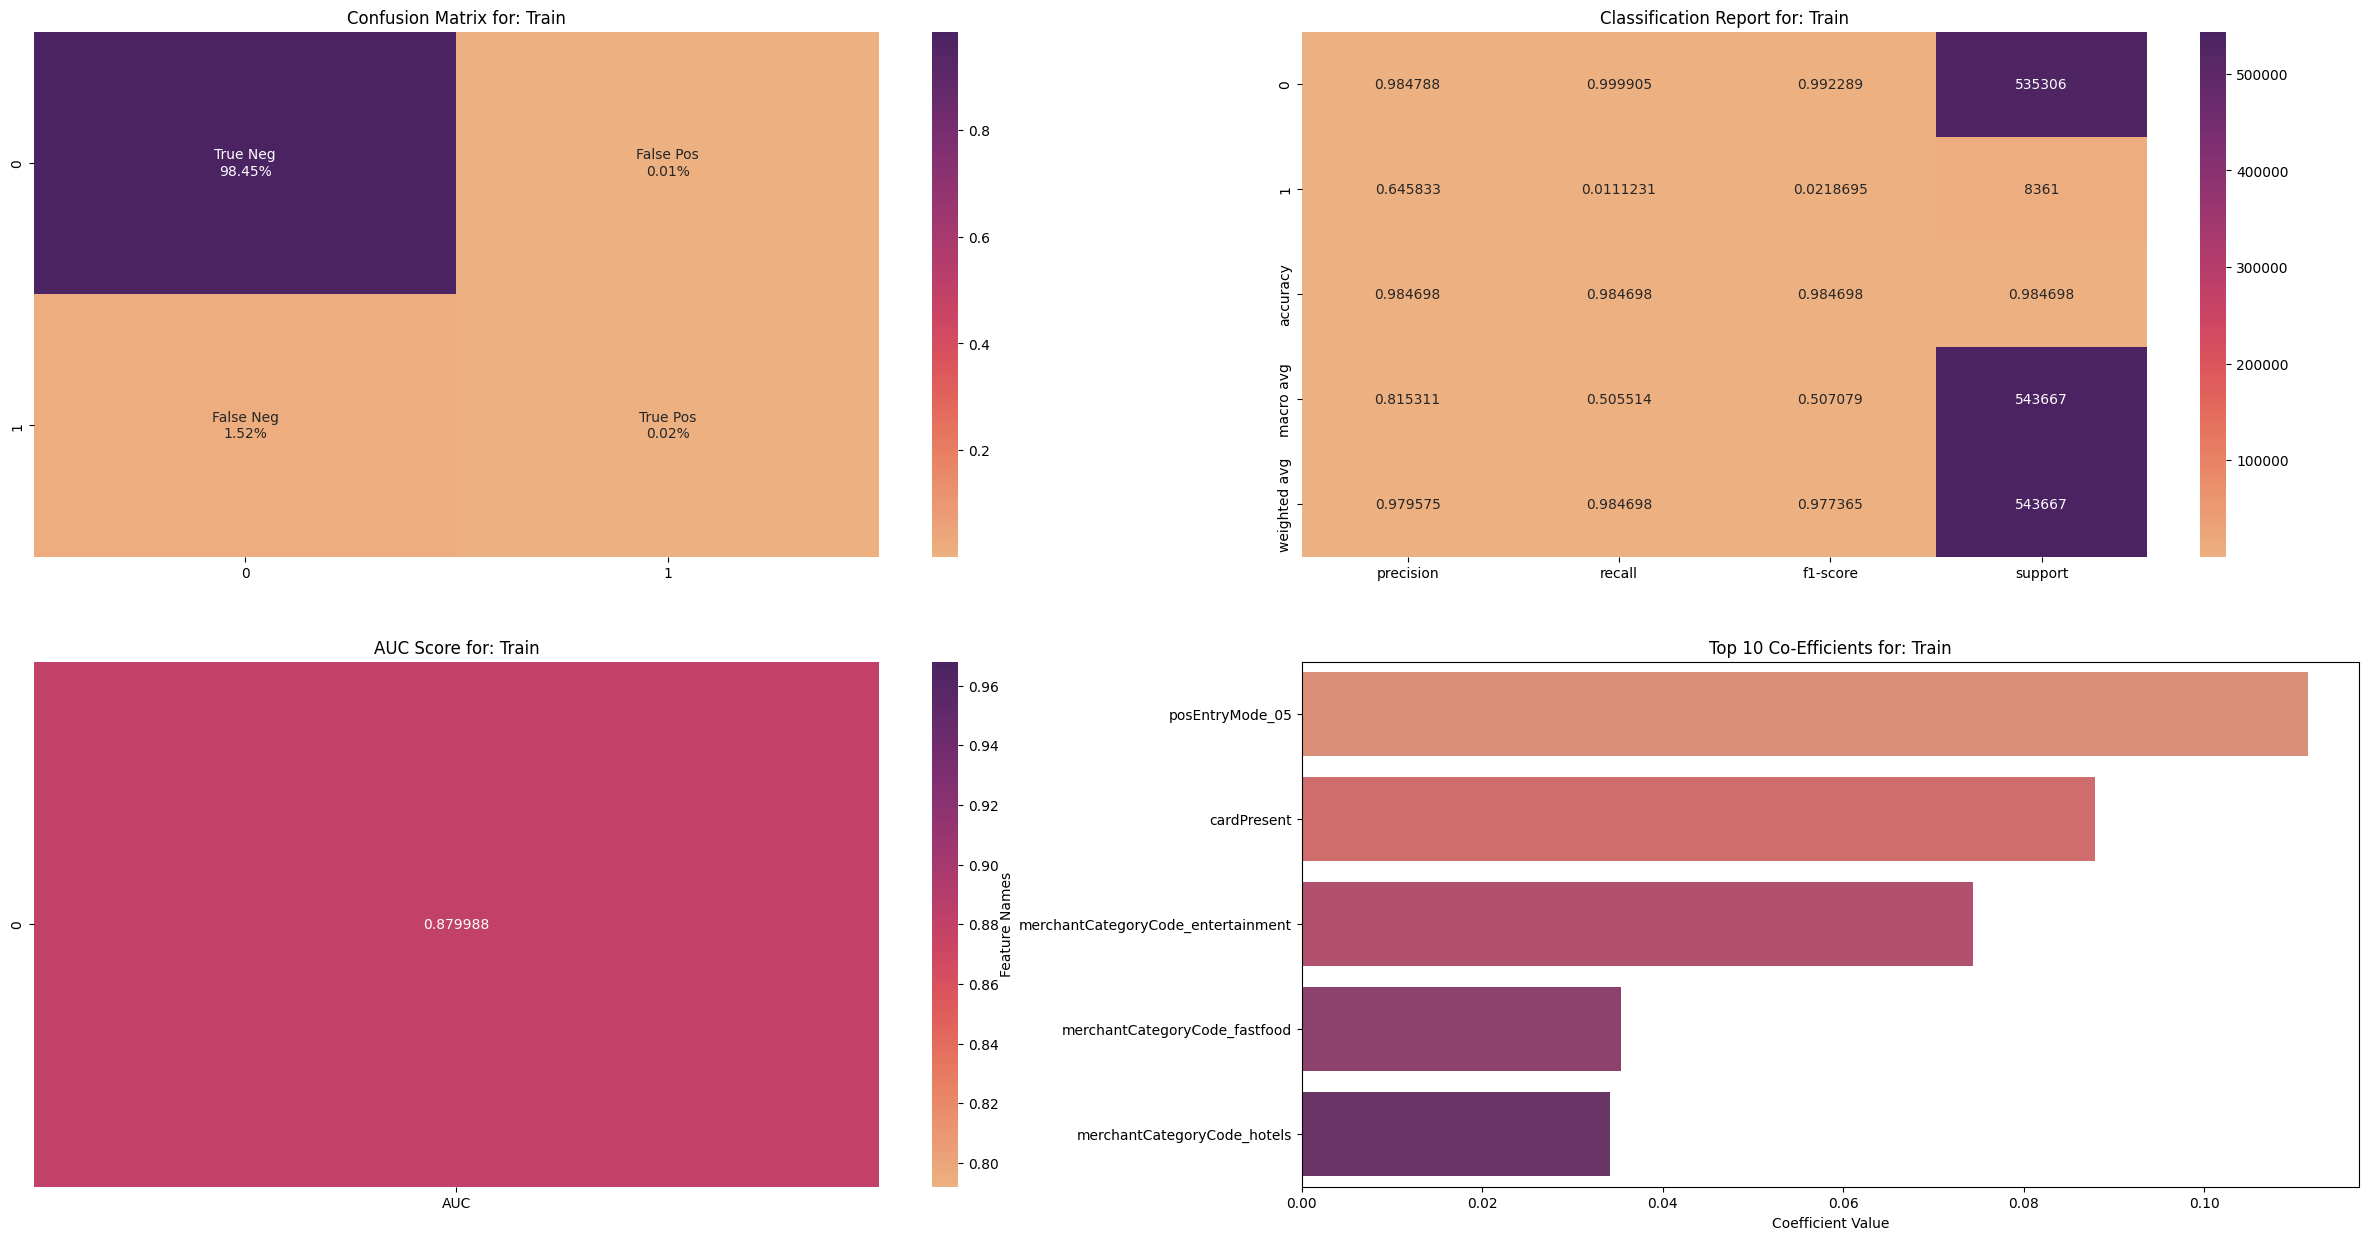

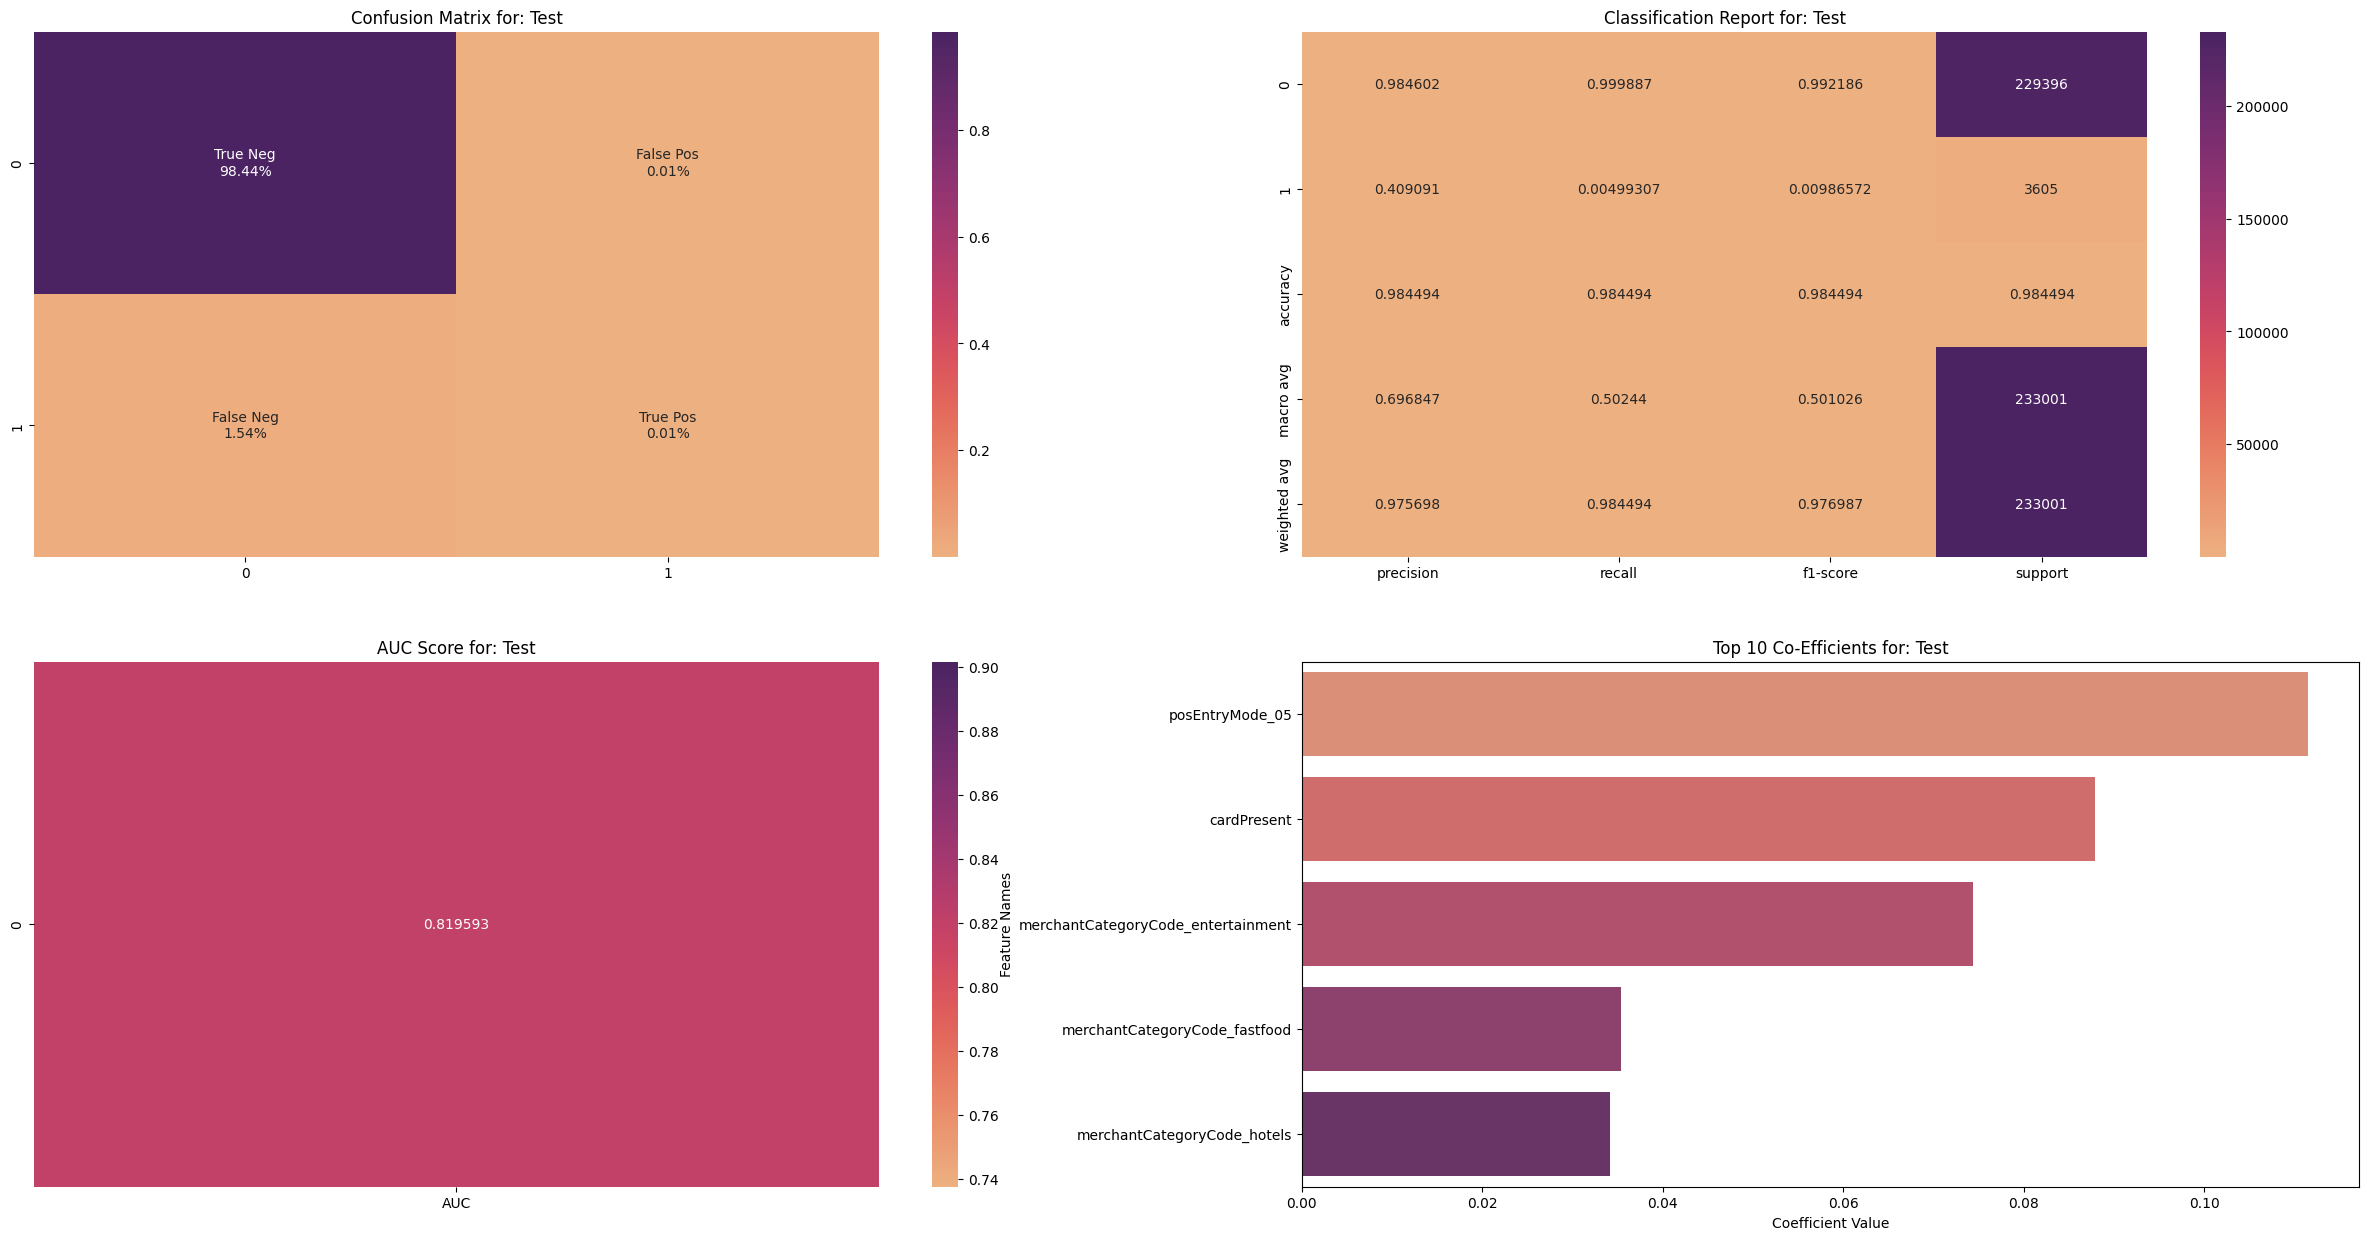

In [216]:
plot_model(confusion_matrix(y_train, y_train_pred),classification_report(y_train, y_train_pred,output_dict=True),coeff_table,auc_pd_train,"Train")
plot_model(confusion_matrix(y_test, y_test_pred),classification_report(y_test, y_test_pred,output_dict=True),coeff_table,auc_pd_test,"Test")

My model achieves an accuracy of 98% and an auc score of 0.81. The features used are shown in the above diagrams and the I decided to use XGBoost as it's one of the best models due to the bosting abilities of the model. I would further use hyper-parameter tuning to ensure that I am able to get the best accuracy.